由于接口的请求加上了 token 参数，如果不深入分析并找到 token 的构造逻辑，我们是难以直接模拟这些 Ajax 请求的。

此时解决方法通常有两种，一种是深挖其中的逻辑，把其中 token 的构造逻辑完全找出来，再用 Python 复现，构造 Ajax 请求；另外一种方法就是直接通过模拟浏览器的方式，绕过这个过程。因为在浏览器里面我们是可以看到这个数据的，如果能直接把看到的数据爬取下来，当然也就能获取对应的信息了。

由于第 1 种方法难度较高，在这里我们就先介绍第 2 种方法，模拟浏览器爬取。

这里使用的工具为 Selenium，我们先来了解一下 Selenium 的基本使用方法吧。

Selenium 是一个自动化测试工具，利用它可以驱动浏览器执行特定的动作，如点击、下拉等操作，同时还可以获取浏览器当前呈现的页面源代码，做到可见即可爬。对于一些使用 JavaScript 动态渲染的页面来说，此种抓取方式非常有效。本课时就让我们来感受一下它的强大之处吧。

准备工作
本课时以 Chrome 为例来讲解 Selenium 的用法。在开始之前，请确保已经正确安装好了 Chrome 浏览器并配置好了 ChromeDriver。另外，还需要正确安装好 Python 的 Selenium 库。

## 基本使用
准备工作做好之后，首先来看一下 Selenium 有一些怎样的功能。示例如下：

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait

https://www.baidu.com/s?ie=utf-8&f=8&rsv_bp=1&rsv_idx=1&tn=baidu&wd=Python&fenlei=256&rsv_pq=dcf912c3000533e5&rsv_t=e89dFcyG13TanzgACeQ8MYE0M3uF2B4j1upKQDhqFr3YM%2BA2Z1lyMKyRj3E&rqlang=cn&rsv_enter=1&rsv_dl=tb&rsv_sug3=6&rsv_sug2=0&rsv_btype=i&inputT=95&rsv_sug4=95
[{'domain': '.baidu.com', 'httpOnly': False, 'name': 'H_PS_PSSID', 'path': '/', 'secure': False, 'value': '7550_32606_1447_32694_32116_32691_32580'}, {'domain': '.baidu.com', 'httpOnly': False, 'name': 'PSINO', 'path': '/', 'secure': False, 'value': '1'}, {'domain': 'www.baidu.com', 'httpOnly': False, 'name': 'BD_CK_SAM', 'path': '/', 'secure': False, 'value': '1'}, {'domain': '.baidu.com', 'expiry': 1631002247, 'httpOnly': False, 'name': 'BAIDUID', 'path': '/', 'secure': False, 'value': '090DBD240F82A996BF949447B3E9FB4A:FG=1'}, {'domain': '.baidu.com', 'httpOnly': False, 'name': 'delPer', 'path': '/', 'secure': False, 'value': '0'}, {'domain': '.baidu.com', 'expiry': 3746949894, 'httpOnly': False, 'name': 'BIDUPSID', 'path'
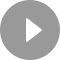
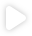
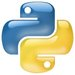
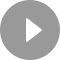
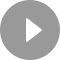
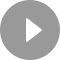
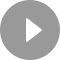
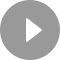
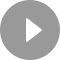
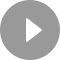
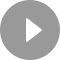

In [2]:
browser = webdriver.Chrome()
try:
    browser.get('https://www.baidu.com')
    input = browser.find_element_by_id('kw')
    input.send_keys('Python')
    input.send_keys(Keys.ENTER)
    wait = WebDriverWait(browser, 10)
    wait.until(EC.presence_of_all_elements_located((By.ID, 'content_left')))
    print(browser.current_url)
    print(browser.get_cookies())
    print(browser.page_source)
finally:
    browser.close()

## 声明浏览器对象
Selenium 支持非常多的浏览器，如 Chrome、Firefox、Edge 等，还有 Android、BlackBerry 等手机端的浏览器。

此外，我们可以用如下方式进行初始化：

In [6]:
from selenium import webdriver
browser = webdriver.Chrome() 
browser = webdriver.Firefox() 
browser = webdriver.Edge() 
browser = webdriver.Safari()

SyntaxError: invalid character in identifier (<ipython-input-6-a189487cf3df>, line 2)

这样就完成了浏览器对象的初始化并将其赋值为 browser 对象。接下来，我们要做的就是调用 browser 对象，让其执行各个动作以模拟浏览器操作。

## 访问页面
我们可以用 get 方法来请求网页，只需要把参数传入链接 URL 即可。比如，这里用 get 方法访问淘宝，然后打印出源代码，代码如下：

In [11]:
from selenium import webdriver
browser = webdriver.Chrome()
browser.get('http:\\www.taobao.com')
print(browser.page_source) 
browser.close()

<html lang="zh-CN" class="ks-webkit537 ks-webkit ks-chrome83 ks-chrome"><head><script>/*! 2020-06-10 16:02:32 v8.14.1 */
!function(e){function i(n){if(o[n])return o[n].exports;var r=o[n]={exports:{},id:n,loaded:!1};return e[n].call(r.exports,r,r.exports,i),r.loaded=!0,r.exports}var o={};return i.m=e,i.c=o,i.p="",i(0)}([function(e,i){"use strict";var o=window,n=document;!function(){var e=2,r="ali_analytics";if(o[r]&&o[r].ua&&e<=o[r].ua.version)return void(i.info=o[r].ua);var t,a,d,s,c,u,h,l,m,b,f,v,p,w,g,x,z,O=o.navigator,k=O.appVersion,T=O&&O.userAgent||"",y=function(e){var i=0;return parseFloat(e.replace(/\./g,function(){return 0===i++?".":""}))},_=function(e,i){var o,n;i[o="trident"]=.1,(n=e.match(/Trident\/([\d.]*)/))&&n[1]&&(i[o]=y(n[1])),i.core=o},N=function(e){var i,o;return(i=e.match(/MSIE ([^;]*)|Trident.*; rv(?:\s|:)?([0-9.]+)/))&&(o=i[1]||i[2])?y(o):0},P=function(e){return e||"other"},M=function(e){function i(){for(var i=[["Windows NT 5.1","winXP"],["Windows NT 6.1","win7"],[

运行后会弹出 Chrome 浏览器并且自动访问淘宝，然后控制台会输出淘宝页面的源代码，随后浏览器关闭。

通过这几行简单的代码，我们就可以驱动浏览器并获取网页源码，非常便捷。

## 查找节点
Selenium 可以驱动浏览器完成各种操作，比如填充表单、模拟点击等。举个例子，当我们想要完成向某个输入框输入文字的操作时，首先需要知道这个输入框在哪，而 Selenium 提供了一系列查找节点的方法，我们可以用这些方法来获取想要的节点，以便执行下一步动作或者提取信息。

单个节点

当我们想要从淘宝页面中提取搜索框这个节点，首先要观察它的源代码，如图所示。

可以发现，它的 id 是 q，name 也是 q，此外还有许多其他属性。此时我们就可以用多种方式获取它了。比如，find_element_by_name 代表根据 name 值获取，find_element_by_id 则是根据 id 获取，另外，还有根据 XPath、CSS 选择器等获取的方式。

我们用代码实现一下：

In [16]:
from selenium import webdriver
browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
input_first = browser.find_element_by_id('q')
input_second = browser.find_element_by_css_selector('#q')
input_third = browser.find_element_by_xpath('//*[@id="q"]')
print('1:',input_first, '\n2:',input_second, '\n3:',input_third)
browser.close()

1: <selenium.webdriver.remote.webelement.WebElement (session="ecd82209258f3f6f2e7b30d812bd77fc", element="5b466600-4ead-4adb-ba36-bd9f0230b993")> 
2: <selenium.webdriver.remote.webelement.WebElement (session="ecd82209258f3f6f2e7b30d812bd77fc", element="5b466600-4ead-4adb-ba36-bd9f0230b993")> 
3: <selenium.webdriver.remote.webelement.WebElement (session="ecd82209258f3f6f2e7b30d812bd77fc", element="5b466600-4ead-4adb-ba36-bd9f0230b993")>


可以看到，这 3 个节点的类型是一致的，都是 WebElement。

这里列出所有获取单个节点的方法：

另外，Selenium 还提供了 find_element 这个通用方法，它需要传入两个参数：查找方式 By 和值。实际上，find_element 就是 find_element_by_id 这种方法的通用函数版本，比如 find_element_by_id(id) 就等价于 find_element(By.ID, id)，二者得到的结果完全一致。其他的查找方式也是如此，我们用By的方式实现一下上面的查找：

In [19]:
from selenium import webdriver
browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
input_first = browser.find_element(By.ID,'q')
input_second = browser.find_element(By.CSS_SELECTOR,'#q')
input_third = browser.find_element(By.XPATH,'//*[@id="q"]')
print('1:',input_first, '\n2:',input_second, '\n3:',input_third)
browser.close()

1: <selenium.webdriver.remote.webelement.WebElement (session="a6db123ef7ac5c2cf1cd5aa974b41b2c", element="4174e8e1-56af-4b7c-a88a-4acb3522bdcc")> 
2: <selenium.webdriver.remote.webelement.WebElement (session="a6db123ef7ac5c2cf1cd5aa974b41b2c", element="4174e8e1-56af-4b7c-a88a-4acb3522bdcc")> 
3: <selenium.webdriver.remote.webelement.WebElement (session="a6db123ef7ac5c2cf1cd5aa974b41b2c", element="4174e8e1-56af-4b7c-a88a-4acb3522bdcc")>


这种查找方式的功能和上面列举的查找函数完全一致，不过参数更加灵活。

多个节点

如果在网页中只查找一个目标，那么完全可以用 find_element 方法。但如果有多个节点需要查找，再用 find_element 方法，就只能得到第 1 个节点了。如果要查找所有满足条件的节点，需要用 find_elements 这样的方法。注意，在这个方法的名称中，element 多了一个 s，注意区分。

举个例子，假如你要查找淘宝左侧导航条的所有条目，就可以这样来实现：

In [24]:
from selenium import webdriver
browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
lis = browser.find_elements_by_css_selector('.service-bd li')
print(lis)
browser.close()

[<selenium.webdriver.remote.webelement.WebElement (session="44176dbc56b8c12037fb7741e3dad020", element="25dfe629-28b3-4ae8-9a03-a79a43b80e6f")>, <selenium.webdriver.remote.webelement.WebElement (session="44176dbc56b8c12037fb7741e3dad020", element="02b38482-deb6-4179-9c93-1291774d8d01")>, <selenium.webdriver.remote.webelement.WebElement (session="44176dbc56b8c12037fb7741e3dad020", element="0022688a-2607-4e4d-8eb3-64a427c29134")>, <selenium.webdriver.remote.webelement.WebElement (session="44176dbc56b8c12037fb7741e3dad020", element="f93c84b0-11c9-4a35-85e7-8b7bfcd2ca36")>, <selenium.webdriver.remote.webelement.WebElement (session="44176dbc56b8c12037fb7741e3dad020", element="805fc5d6-e301-4c60-a1fc-23a858c67ddf")>, <selenium.webdriver.remote.webelement.WebElement (session="44176dbc56b8c12037fb7741e3dad020", element="cc0ba226-a8f8-4db5-96f9-2d4c31b794a0")>, <selenium.webdriver.remote.webelement.WebElement (session="44176dbc56b8c12037fb7741e3dad020", element="0c0d9576-5522-4b21-a87b-55668e44

可以看到，得到的内容变成了列表类型，列表中的每个节点都是 WebElement 类型。

也就是说，如果我们用 find_element 方法，只能获取匹配的第一个节点，结果是 WebElement 类型。如果用 find_elements 方法，则结果是列表类型，列表中的每个节点是 WebElement 类型。

这里列出所有获取多个节点的方法：

## 节点交互
Selenium 可以驱动浏览器来执行一些操作，或者说可以让浏览器模拟执行一些动作。比较常见的用法有：输入文字时用 send_keys 方法，清空文字时用 clear 方法，点击按钮时用 click 方法。示例如下：

In [27]:
from selenium import webdriver
import time
browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
input = browser.find_element_by_id('q')
input.send_keys('iPhone')
time.sleep(1)
input.clear()
input.send_keys('iPad')
button = browser.find_element_by_class_name('btn-search')
button.click()

这里首先驱动浏览器打开淘宝，用 find_element_by_id 方法获取输入框，然后用 send_keys 方法输入 iPhone 文字，等待一秒后用 clear 方法清空输入框，接着再次调用 send_keys 方法输入 iPad 文字，之后再用 find_element_by_class_name 方法获取搜索按钮，最后调用 click 方法完成搜索动作。

通过上面的方法，我们就完成了一些常见节点的动作操作，更多的操作可以参见官方文档的交互动作介绍 ：http://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.remote.webelement。

## 动作链
在上面的实例中，一些交互动作都是针对某个节点执行的。比如，对于输入框，我们调用它的输入文字和清空文字方法；对于按钮，我们调用它的点击方法。其实，还有另外一些操作，它们没有特定的执行对象，比如鼠标拖拽、键盘按键等，这些动作用另一种方式来执行，那就是动作链。

比如，现在我要实现一个节点的拖拽操作，将某个节点从一处拖拽到另外一处，可以这样实现

In [29]:
from selenium import webdriver
from selenium.webdriver import ActionChains
browser = webdriver.Chrome()
url = 'http://www.runoob.com/try/try.php?filename=jqueryui-api-droppable'
browser.get(url)
browser.switch_to_frame('iframeResult')
source = browser.find_element_by_css_selector('#draggable')
target = browser.find_element_by_css_selector('#droppable')
actions = ActionChains(browser)
actions.drag_and_drop(source, target)
actions.perform()

D:\studyAPP\anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: use driver.switch_to.frame instead
  


首先，打开网页中的一个拖拽实例，依次选中要拖拽的节点和拖拽到的目标节点，接着声明 ActionChains 对象并将其赋值为 actions 变量，然后通过调用 actions 变量的 drag_and_drop 方法，再调用 perform 方法执行动作，此时就完成了拖拽操作，如图所示：

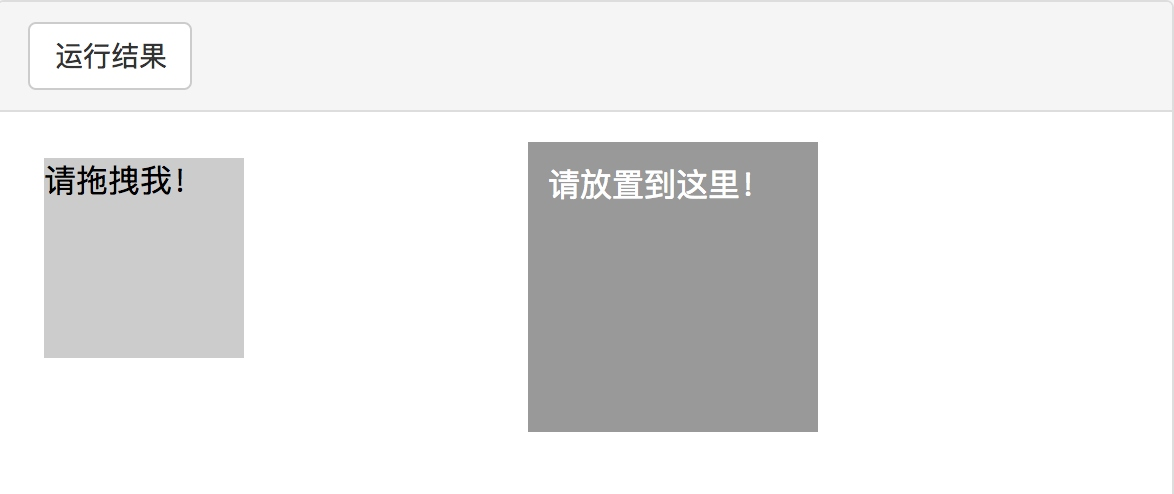

运行后
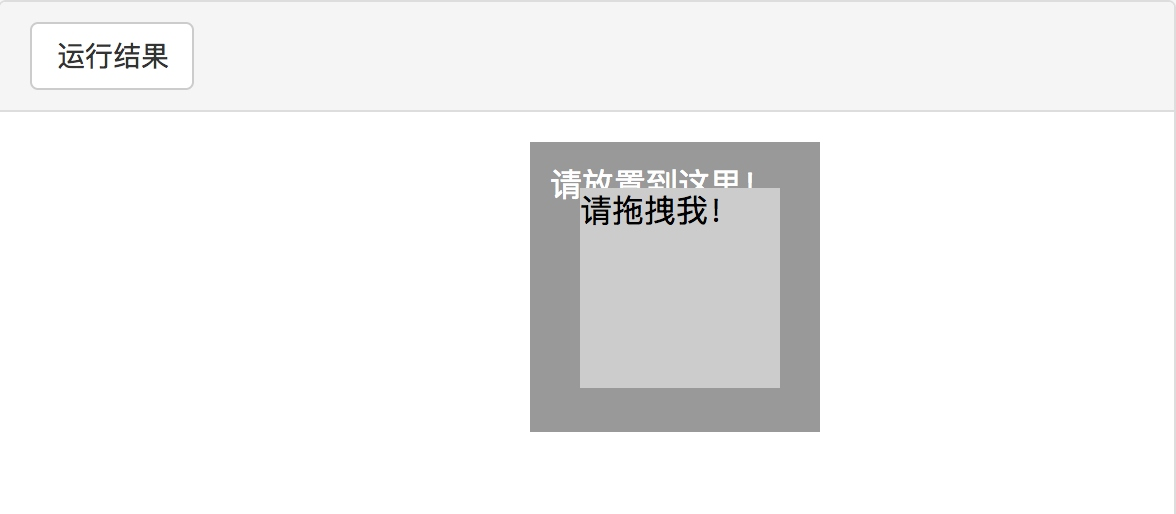

以上两图分别为在拖拽前和拖拽后的结果。

更多的动作链操作可以参考官方文档的动作链介绍：http://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.common.action_chains。

执行 JavaScript
Selenium API 并没有提供实现某些操作的方法，比如，下拉进度条。但它可以直接模拟运行 JavaScript，此时使用 execute_script 方法即可实现，代码如下：

In [30]:
from selenium import webdriver
browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
browser.execute_script('window.scrollTo(0, document.body.scrollHeight)')
browser.execute_script('alert("To Bottom")')

In [31]:
from selenium import webdriver
browser = webdriver.Chrome()
browser.get('https://www.taobao.com')
browser.execute_script('window.scrollTo(0, document.body.scrollHeight)')
browser.execute_script('alert("To Bottom")')

这里利用 execute_script 方法将进度条下拉到最底部，然后弹出 alert 提示框。

有了这个方法，基本上 API 没有提供的所有功能都可以用执行 JavaScript 的方式来实现了。

## 获取节点信息
前面说过，通过 page_source 属性可以获取网页的源代码，接着就可以使用解析库（如正则表达式、Beautiful Soup、pyquery 等）来提取信息了。

不过，既然 Selenium 已经提供了选择节点的方法，并且返回的是 WebElement 类型，那么它也有相关的方法和属性来直接提取节点信息，如属性、文本等。这样的话，我们就可以不用通过解析源代码来提取信息了，非常方便。

接下来，我们就来看看可以通过怎样的方式来获取节点信息吧。

### 获取属性

我们可以使用 get_attribute 方法来获取节点的属性，但是前提是得先选中这个节点，示例如下：

In [35]:
from selenium import webdriver
browser = webdriver.Chrome()
url = 'https://www.lagou.com/'
browser.get(url)
logo = browser.find_element_by_class_name('logo')
print(logo)
print(logo.get_attribute('href'))

<selenium.webdriver.remote.webelement.WebElement (session="dccb2fc41cd34958ee1ceb5907927551", element="31b02d9a-1c97-4d32-aff4-5d2fee5a37da")>
https://www.lagou.com/


通过 get_attribute 方法，我们只需要传入想要获取的属性名，就可以得到它的值了。

获取文本值

每个 WebElement 节点都有 text 属性，直接调用这个属性就可以得到节点内部的文本信息，这相当于 pyquery 的 text 方法，示例如下：

In [40]:
from selenium import webdriver
browser = webdriver.Chrome()
url = 'https://www.taobao.com/'
browser.get(url)
logo = browser.find_elements_by_class_name('title')
for l in logo:
    print(l.text)

五金机电
潮流男装
同城家装
生活百货



在这里先打开淘宝网，获取所有类名为title的对象，打印每一个对象的文本信息。

获取 ID、位置、标签名、大小
另外，WebElement 节点还有一些其他属性，比如 id 属性可以获取节点 id，location 属性可以获取该节点在页面中的相对位置，tag_name 属性可以获取标签名称，size 属性可以获取节点的大小，也就是宽高，这些属性有时候还是很有用的。示例如下：

In [43]:
from selenium import webdriver 
browser = webdriver.Chrome()
url = 'https://www.lagou.com/'
browser.get(url)
input = browser.find_element_by_class_name('logo')
print(input.id)
print(input.location)
print(input.tag_name)
print(input.size)

bf12a28c-46d4-43e6-9e81-5006fda86924
{'x': 0, 'y': 0}
a
{'height': 40, 'width': 43}


这里首先获得 class 为 logo这个节点，然后调用其 id、location、tag_name、size 属性来获取对应的属性值。

## 切换 Frame
我们知道网页中有一种节点叫作 iframe，也就是子 Frame，相当于页面的子页面，它的结构和外部网页的结构完全一致。Selenium 打开页面后，默认是在父级 Frame 里面操作，而此时如果页面中还有子 Frame，Selenium 是不能获取到子 Frame 里面的节点的。这时就需要使用 switch_to.frame 方法来切换 Frame。示例如下：

In [46]:
import time
from selenium import webdriver 
from selenium.common.exceptions import NoSuchElementException
browser = webdriver.Chrome()
url = 'http://www.runoob.com/try/try.php?filename=jqueryui-api-droppable'
browser.get(url)
browser.switch_to.frame('iframeResult')
try:
    logo = browser.find_element_by_class_name('logo')
except NoSuchElementException:
    print('NO LOGO')
browser.switch_to.parent_frame()
logo = browser.find_element_by_class_name('logo')
print(logo)
print(logo.text)

NO LOGO
<selenium.webdriver.remote.webelement.WebElement (session="eac92334e78ee9b841ea7428fc375a02", element="08509235-eab8-4b4f-bdcb-b2ca628b610b")>
RUNOOB.COM


这里还是以前面演示动作链操作的网页为例，首先通过 switch_to.frame 方法切换到子 Frame 里面，然后尝试获取子 Frame 里的 logo 节点（这是不能找到的），如果找不到的话，就会抛出 NoSuchElementException 异常，异常被捕捉之后，就会输出 NO LOGO。接下来，我们需要重新切换回父级 Frame，然后再次重新获取节点，发现此时可以成功获取了。

所以，当页面中包含子 Frame 时，如果想获取子 Frame 中的节点，需要先调用 switch_to.frame 方法切换到对应的 Frame，然后再进行操作。

## 延时等待
在 Selenium 中，get 方法会在网页框架加载结束后结束执行，此时如果获取 page_source，可能并不是浏览器完全加载完成的页面，如果某些页面有额外的 Ajax 请求，我们在网页源代码中也不一定能成功获取到。所以，这里需要延时等待一定时间，确保节点已经加载出来。

这里等待的方式有两种：一种是隐式等待，一种是显式等待。

### 隐式等待

当使用隐式等待执行测试的时候，如果 Selenium 没有在 DOM 中找到节点，将继续等待，超出设定时间后，则抛出找不到节点的异常。换句话说，隐式等待可以在我们查找节点而节点并没有立即出现的时候，等待一段时间再查找 DOM，默认的时间是 0。示例如下：

In [48]:
from selenium import webdriver
browser = webdriver.Chrome()
url = 'https://www.lagou.com/'
browser.implicitly_wait(10)
browser.get(url)
logo = browser.find_element_by_class_name('logo')
print(logo)

<selenium.webdriver.remote.webelement.WebElement (session="8043f61a56262e4f5b36c6f5051e9958", element="9c73ab83-0e83-447f-8f7c-e181bf5b2921")>


在这里我们用 implicitly_wait 方法实现了隐式等待。

### 显式等待

隐式等待的效果其实并没有那么好，因为我们只规定了一个固定时间，而页面的加载时间会受到网络条件的影响。

这里还有一种更合适的显式等待方法，它指定要查找的节点，然后指定一个最长等待时间。如果在规定时间内加载出来了这个节点，就返回查找的节点；如果到了规定时间依然没有加载出该节点，则抛出超时异常。示例如下：

In [50]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
browser = webdriver.Chrome()
browser.get('http://taobao.com/')
wait = WebDriverWait(browser, 10)
input = wait.until(EC.presence_of_all_elements_located((By.ID, 'q')))
button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, '.bth-search')))
print(input, button)

TimeoutException: Message: 


这里首先引入 WebDriverWait 这个对象，指定最长等待时间，然后调用它的 until() 方法，传入要等待条件 expected_conditions。比如，这里传入了 presence_of_element_located 这个条件，代表节点出现，其参数是节点的定位元组，也就是 ID 为 q 的节点搜索框。

这样做的效果就是，在 10 秒内如果 ID 为 q 的节点（即搜索框）成功加载出来，就返回该节点；如果超过 10 秒还没有加载出来，就抛出异常。

对于按钮，我们可以更改一下等待条件，比如改为 element_to_be_clickable，也就是可点击，所以查找按钮时先查找 CSS 选择器为.btn-search 的按钮，如果 10 秒内它是可点击的，也就代表它成功加载出来了，就会返回这个按钮节点；如果超过 10 秒还不可点击，也就是没有加载出来，就抛出异常。

现在我们运行代码，它在网速较佳的情况下是可以成功加载出来的。

控制台的输出如下：

关于等待条件，其实还有很多，比如判断标题内容，判断某个节点内是否出现了某文字等。下表我列出了所有的等待条件。



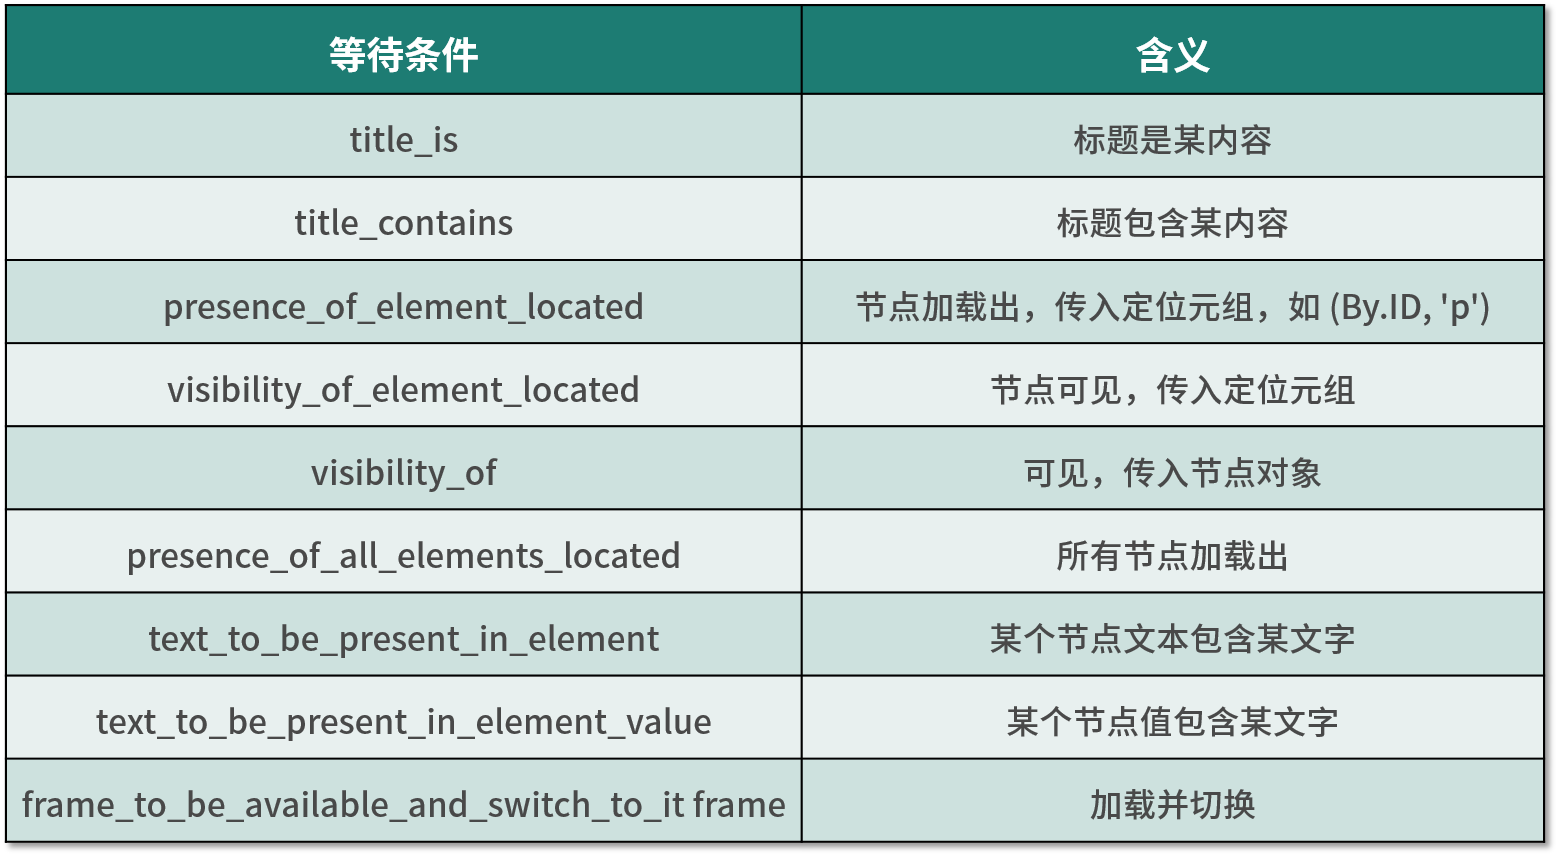

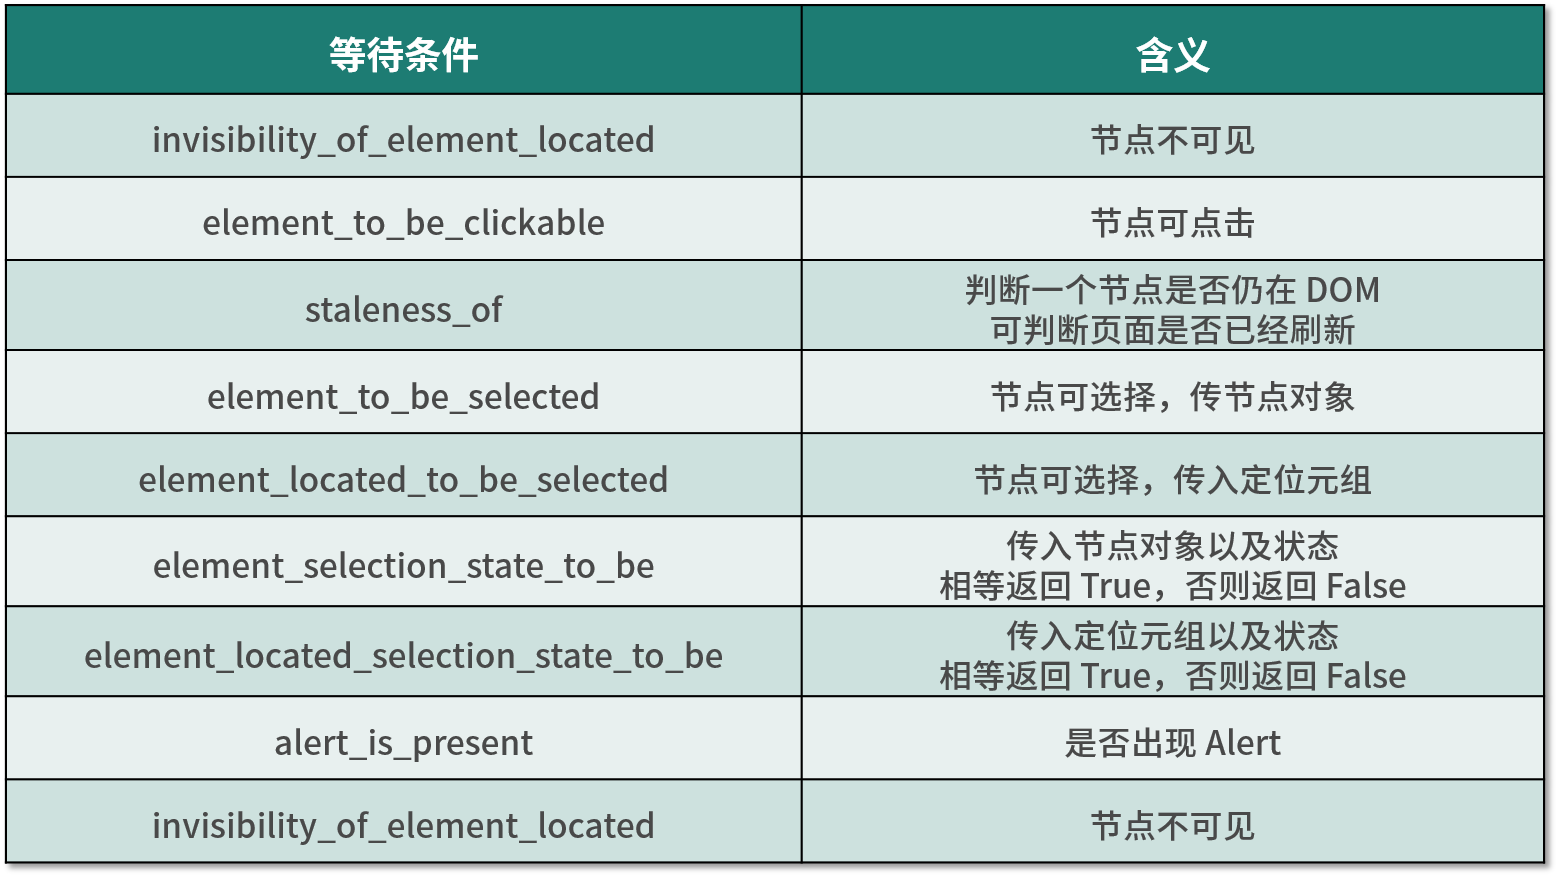

更多详细的等待条件的参数及用法介绍可以参考官方文档：http://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.support.expected_conditions。

## 前进后退
平常我们使用浏览器时都有前进和后退功能，Selenium 也可以完成这个操作，它使用 back 方法后退，使用 forward 方法前进。示例如下：

In [52]:
import time
from selenium import webdriver
browser = webdriver.Chrome()
browser.get('https://www.baidu.com/')
browser.get('https://www.taobao.com/')
browser.get('https://www.python.org/')
browser.back()
time.sleep(1)
browser.forward()
browser.close()

这里我们连续访问 3 个页面，然后调用 back 方法回到第 2 个页面，接下来再调用 forward 方法又可以前进到第 3 个页面。

### Cookies
使用 Selenium，还可以方便地对 Cookies 进行操作，例如获取、添加、删除 Cookies 等。示例如下：

In [63]:
from selenium import webdriver
browser = webdriver.Chrome()
browser.implicitly_wait(10)
browser.get('https://www.zhihu.com/')
print('first:',browser.get_cookies,'\n')
browser.implicitly_wait(10)
browser.add_cookie({'name': 'name', 'domain': 'www.zhihu.com', 'value': 'germey'})
print('second:',browser.get_cookies(),'\n')
browser.implicitly_wait(10)
browser.delete_all_cookies()
print('delete:',browser.get_cookies(),'\n')

first: <bound method WebDriver.get_cookies of <selenium.webdriver.chrome.webdriver.WebDriver (session="eaab1d245de192f7403ac275cf33fee1")>> 

second: [{'domain': '.www.zhihu.com', 'httpOnly': False, 'name': 'name', 'path': '/', 'secure': True, 'value': 'germey'}, {'domain': '.zhihu.com', 'expiry': 1602067079, 'httpOnly': True, 'name': 'capsion_ticket', 'path': '/', 'secure': False, 'value': '"2|1:0|10:1599475079|14:capsion_ticket|44:MTYwZTEwYzQ3MjA4NGE0OGI5MjAwMzVhNmE3NjNjMjY=|a9dded2e830fb2be1621cd08093dd303c747fea332dda175db0eb5d2ce38ebde"'}, {'domain': '.zhihu.com', 'expiry': 1599561480, 'httpOnly': False, 'name': '_gid', 'path': '/', 'secure': False, 'value': 'GA1.2.1941945975.1599475080'}, {'domain': '.zhihu.com', 'expiry': 1662547080, 'httpOnly': False, 'name': '_ga', 'path': '/', 'secure': False, 'value': 'GA1.2.2006572428.1599475080'}, {'domain': '.zhihu.com', 'expiry': 1599475140, 'httpOnly': False, 'name': '_gat_gtag_UA_149949619_1', 'path': '/', 'secure': False, 'value': '1'

首先，我们访问知乎，加载完成后，浏览器实际上已经生成 Cookies 了。接着，调用 get_cookies 方法获取所有的 Cookies。然后，我们再添加一个 Cookie，这里传入一个字典，有 name、domain 和 value 等内容。接下来，再次获取所有的 Cookies，可以发现，结果会多出这一项新加的 Cookie。最后，调用 delete_all_cookies 方法删除所有的 Cookies。再重新获取，发现结果就为空了。

## 选项卡管理
在访问网页的时候，我们通常会开启多个选项卡。在 Selenium 中，我们也可以对选项卡进行操作。示例如下：

In [64]:
import time
from selenium import webdriver
browser = webdriver.Chrome()
browser.get('https://www.baidu.com')
browser.execute_script('window.open()')
print(browser.window_handles)
browser.switch_to.window(browser.window_handles[1])
browser.get('https://www.taobao.com')
time.sleep(1)
browser.switch_to.window(browser.window_handles[0])
browser.get('https://python.org')

['CDwindow-C9D3989A22007E4F6F6773B567FD51CD', 'CDwindow-7690CCFBDBCACC817458695E996C9DBA']


首先访问百度，然后调用 execute_script 方法，这里我们传入 window.open 这个 JavaScript 语句新开启一个选项卡，然后切换到该选项卡，调用 window_handles 属性获取当前开启的所有选项卡，后面的参数代表返回选项卡的代号列表。要想切换选项卡，只需要调用 switch_to.window 方法即可，其中的参数是选项卡的代号。这里我们将第 2 个选项卡代号传入，即跳转到第 2 个选项卡，接下来在第 2 个选项卡下打开一个新页面，如果你想要切换回第 2 个选项卡，只需要重新调用 switch_to.window 方法，再执行其他操作即可。

## 异常处理
在使用 Selenium 的过程中，难免会遇到一些异常，例如超时、节点未找到等错误，一旦出现此类错误，程序便不会继续运行了。这里我们可以使用 try except 语句来捕获各种异常。

首先，演示一下节点未找到的异常，示例如下：

In [66]:
from selenium import webdriver
browser = webdriver.Chrome()
browser.get('https://www.baidu.com')
browser.find_element_by_id('hello')

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[id="hello"]"}
  (Session info: chrome=83.0.4103.61)


可以看到，这里抛出了 NoSuchElementException 异常，通常代表节点未找到。为了防止程序遇到异常而中断，我们需要捕获这些异常，示例如下：

In [68]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException, NoSuchElementException
browser = webdriver.Chrome()
try:
    browser.get('https://www.baidu.com')
except TimeoutException:
    print('Time Out')
try:
    browser.find_element_by_id('hello')
except NoSuchElementException:
    print('No Element')
finally:
    browser.close()

No Element


这里我们使用 try except 来捕获各类异常。比如，我们用 find_element_by_id 查找节点的方法捕获 NoSuchElementException 异常，这样一旦出现这样的错误，就进行异常处理，程序也不会中断了。


关于更多的异常类，可以参考官方文档：：http://selenium-python.readthedocs.io/api.html#module-selenium.common.exceptions 。

## 反屏蔽
现在很多网站都加上了对 Selenium 的检测，来防止一些爬虫的恶意爬取。即如果检测到有人在使用 Selenium 打开浏览器，那就直接屏蔽。

其大多数情况下，检测基本原理是检测当前浏览器窗口下的 window.navigator 对象是否包含 webdriver 这个属性。因为在正常使用浏览器的情况下，这个属性是 undefined，然而一旦我们使用了 Selenium，Selenium 会给 window.navigator 设置 webdriver 属性。很多网站就通过 JavaScript 判断如果 webdriver 属性存在，那就直接屏蔽。

这边有一个典型的案例网站：https://antispider1.scrape.cuiqingcai.com/ ，这个网站就是使用了上述原理实现了 WebDriver 的检测，如果使用 Selenium 直接爬取的话，那就会返回如下页面：

In [69]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException, NoSuchElementException
browser = webdriver.Chrome()
try:
    browser.get('https://antispider1.scrape.cuiqingcai.com/')
except TimeoutException:
    print('Time Out')

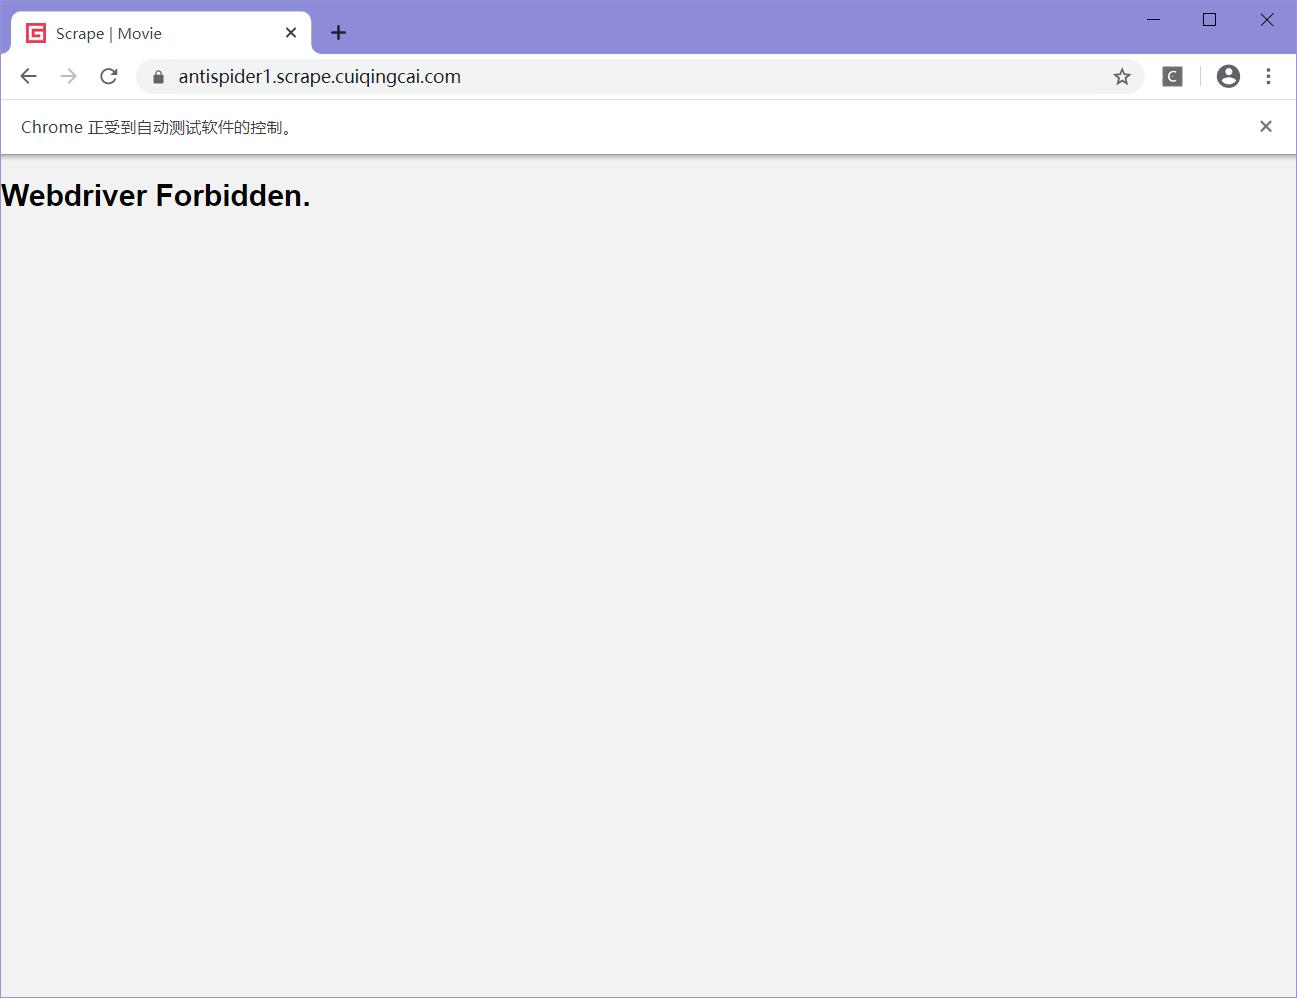

这时候我们可能想到直接使用 JavaScript 直接把这个 webdriver 属性置空，比如通过调用 execute_script 方法来执行如下代码：

In [ ]:
Object.defineProperty(navigator, "webdriver", {get: () => undefined})

这行 JavaScript 的确是可以把 webdriver 属性置空，但是 execute_script 调用这行 JavaScript 语句实际上是在页面加载完毕之后才执行的，执行太晚了，网站早在最初页面渲染之前就已经对 webdriver 属性进行了检测，所以用上述方法并不能达到效果。

在 Selenium 中，我们可以使用 CDP（即 Chrome Devtools-Protocol，Chrome 开发工具协议）来解决这个问题，通过 CDP 我们可以实现在每个页面刚加载的时候执行 JavaScript 代码，执行的 CDP 方法叫作 Page.addScriptToEvaluateOnNewDocument，然后传入上文的 JavaScript 代码即可，这样我们就可以在每次页面加载之前将 webdriver 属性置空了。另外我们还可以加入几个选项来隐藏 WebDriver 提示条和自动化扩展信息，代码实现如下：

In [74]:
from selenium import webdriver
from selenium.webdriver import ChromeOptions
option = ChromeOptions()
option.add_experimental_option('excludeSwitches', ['enable-automation'])
option.add_experimental_option('useAutomationExtension', False)
browser = webdriver.Chrome(options=option)
browser.execute_cdp_cmd('Page.addScriptToEvaluateOnNewDocument', {'source': 'Object.defineProperty(navigator, "webdriver", {get: () => undefined})'
})
browser.get('https://antispider1.scrape.cuiqingcai.com/')

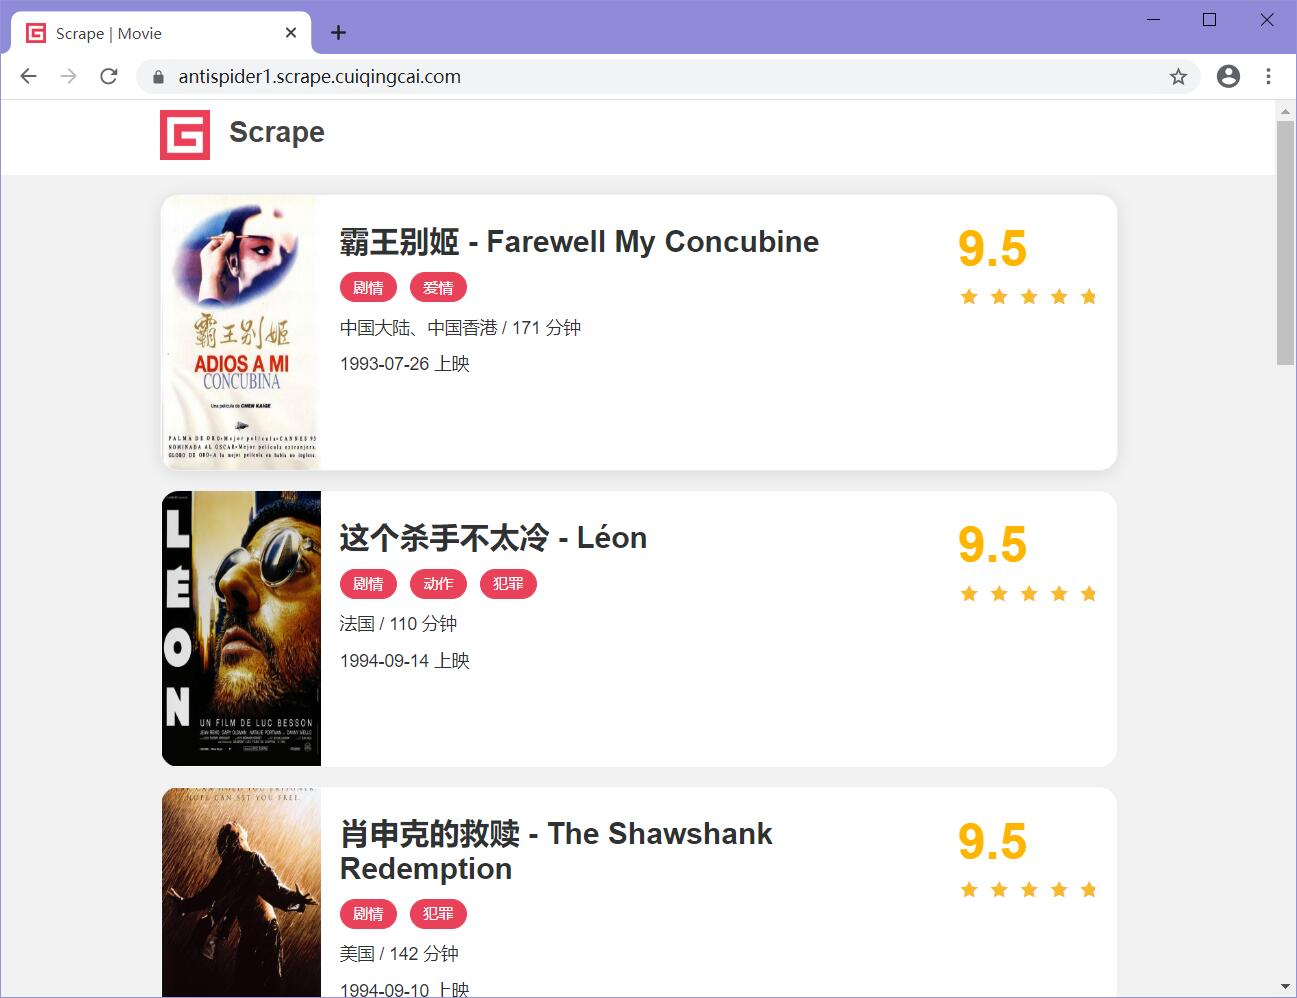

对于大多数的情况，以上的方法均可以实现 Selenium 反屏蔽。但对于一些特殊的网站，如果其有更多的 WebDriver 特征检测，可能需要具体排查。

## 无头模式
上面的案例在运行的时候，我们可以观察到其总会弹出一个浏览器窗口，虽然有助于观察页面爬取状况，但在有些时候窗口弹来弹去也会形成一些干扰。

Chrome 浏览器从 60 版本已经支持了无头模式，即 Headless。无头模式在运行的时候不会再弹出浏览器窗口，减少了干扰，而且它减少了一些资源的加载，如图片等资源，所以也在一定程度上节省了资源加载时间和网络带宽。

我们可以借助于 ChromeOptions 来开启 Chrome Headless 模式，代码实现如下：

In [76]:
from selenium import webdriver
from selenium.webdriver import ChromeOptions
option = ChromeOptions()
option.add_argument('--headless')
browser = webdriver.Chrome(options=option)
browser.set_window_size(1366, 768)
browser.get('https://www.baidu.com')
browser.get_screenshot_as_file('preview.png')

True

这里我们通过 ChromeOptions 的 add_argument 方法添加了一个参数 --headless，开启了无头模式。在无头模式下，我们最好需要设置下窗口的大小，接着打开页面，最后我们调用 get_screenshot_as_file 方法输出了页面的截图。

运行代码之后，我们发现 Chrome 窗口就不会再弹出来了，代码依然正常运行，最后输出了页面截图如图所示。
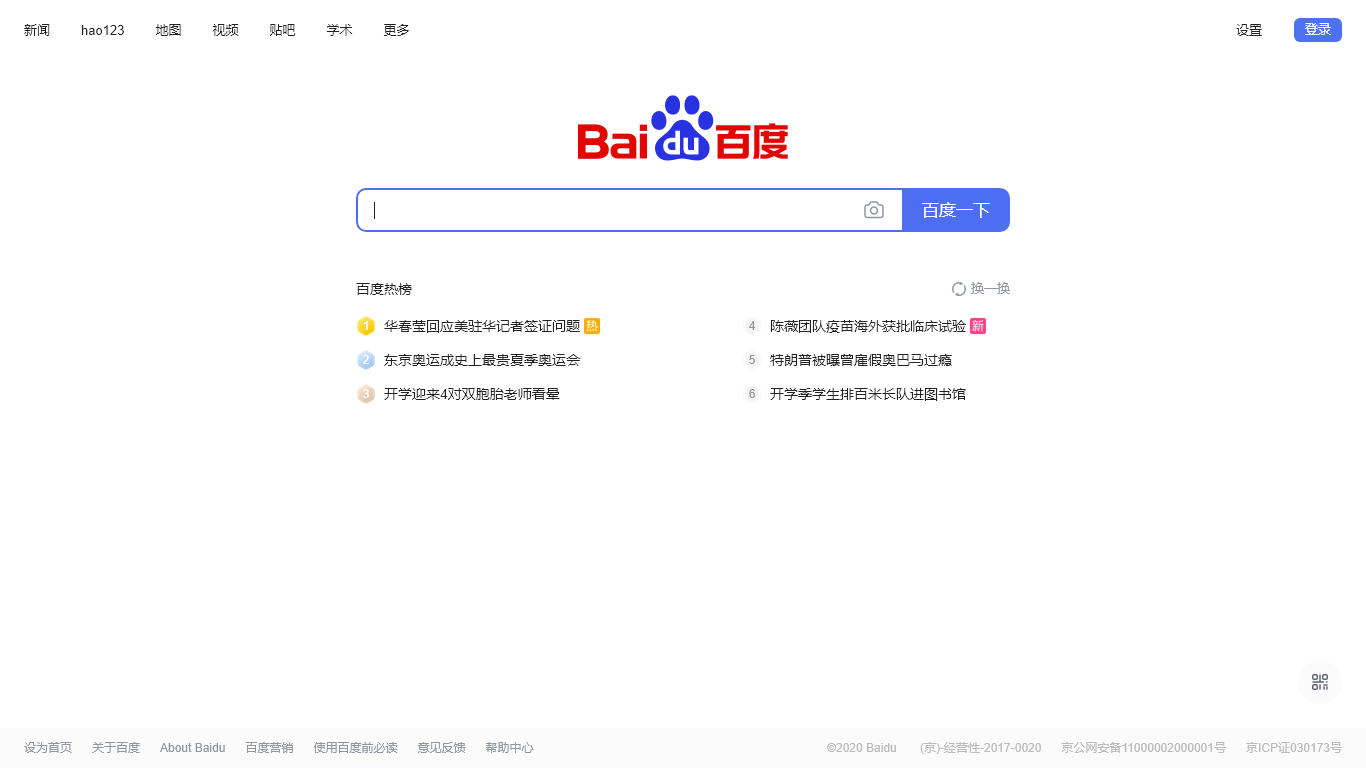